## Making figure A2b

start by importing modules, data and used priors

In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist

from makeCorner import *

In [2]:
cdf_file = "../data/RUNS/power_law_only_high_sigmoids.cdf"
data = az.from_netcdf(cdf_file)

In [3]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "high_alpha":dist.Normal(-2,3),
    "width_alpha":dist.Uniform(-1,1),
    "middle_z_alpha":dist.Uniform(0,0.8),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "high_mMin":dist.Uniform(5, 15),
    "width_mMin":dist.Uniform(-1,1),
    "middle_z_mMin":dist.Uniform(0,0.8),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "mMax":dist.Uniform(50,100),
    "high_mMax":dist.Uniform(50, 100),
    "width_mMax":dist.Uniform(-1,1),
    "middle_z_mMax":dist.Uniform(0,0.8),
    "dmMax":dist.Uniform(0.5,1.5),
    "high_dmMax":dist.Uniform(0.5,1.5),
    "width_dmMax":dist.Uniform(-1,1),
    "middle_z_dmMax":dist.Uniform(0,0.8),
    "dmMin":dist.Uniform(-1,0.5),
    "high_dmMin":dist.Uniform(-1,0.5),
    "width_dmMin":dist.Uniform(-1,1),
    "middle_z_dmMin":dist.Uniform(0,0.8),
    "delta_alpha":dist.Normal(0, np.sqrt(3^2 + 3^2)), # Watch out, two normals together, check distribution!
}

### Making figure A2b

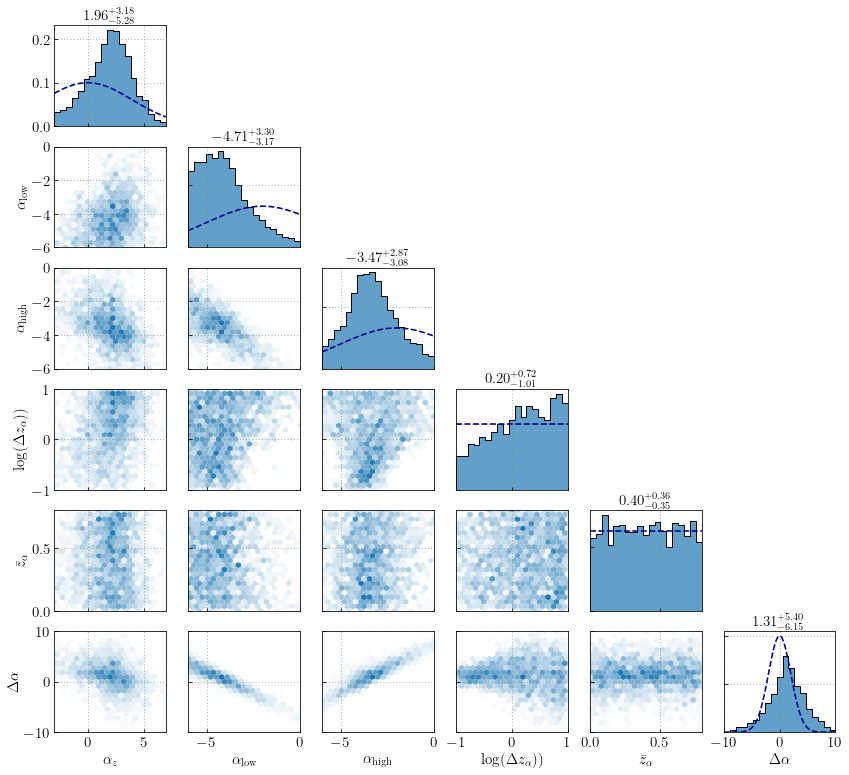

In [4]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))

delta_f_peak = stacked_samples_no_GWB.high_alpha - stacked_samples_no_GWB.alpha_ref

toPlot_no_GWB_f_peak = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-3,7),"label":r"$\alpha_z$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6,0),"label":r"$\alpha_{\rm low}$"},
    "high_alpha":{"data":stacked_samples_no_GWB.high_alpha,"plot_bounds":(-6,0),"label":r"$\alpha_{\rm high}$"},
    "width_alpha":{"data":stacked_samples_no_GWB.log_width_alpha,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\alpha}))$"},
    "middle_z_alpha":{"data":stacked_samples_no_GWB.middle_z_alpha,"plot_bounds":(0,0.8),"label":r"$\bar z_{\alpha}$"},
    "delta_alpha":{"data":delta_f_peak, "plot_bounds":(-10, 10), "label":
                    r"$\Delta \alpha$"
                   },
}

plot_corner(fig, toPlot_no_GWB_f_peak,"#1f78b4",labelsize=15, priors = new_priors)
plt.savefig("PE_alpha_power_law.pdf", dpi = 500, bbox_inches = "tight")
plt.show()